# Iris

Choose features other than the ones used in the lesson. <br>
Visualize the results of your clustering. <br>
Use the elbow method to visually select a good value for k.<br>
Repeat the clustering, this time with 3 different features.<br>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as wr

from sklearn.cluster import KMeans

from pydataset import data

from sklearn.preprocessing import MinMaxScaler

# module for visualizations
# import viz_kmeans

Load in successful, awaiting commands...


# Data Acquisition

In [2]:
df = data('iris')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Data Preparation

In [4]:
# rename columns
new_column_names = []

for col in df.columns:
    new_column_names.append( col.lower().replace('.','_') )
df.columns = new_column_names
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# define independent variables for k-means

X = df[['petal_width', 'sepal_width']]
X.head()

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2
4,0.2,3.1
5,0.2,3.6


# Modeling (2)

In [6]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=3, random_state=123)

# fit on X
kmeans.fit(X)

# use on X
pred = kmeans.predict(X)

In [7]:
# add cluster prediction back onto original AND X dataframe

df['cluster'] = pred
X['cluster'] = pred

df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
52,6.4,3.2,4.5,1.5,versicolor,2
104,6.3,2.9,5.6,1.8,virginica,0
25,4.8,3.4,1.9,0.2,setosa,1
45,5.1,3.8,1.9,0.4,setosa,1
118,7.7,3.8,6.7,2.2,virginica,0
26,5.0,3.0,1.6,0.2,setosa,1
145,6.7,3.3,5.7,2.5,virginica,0
31,4.8,3.1,1.6,0.2,setosa,1
96,5.7,3.0,4.2,1.2,versicolor,2
85,5.4,3.0,4.5,1.5,versicolor,2


## Visualize

In [8]:
# first numerically
df.groupby('species')['petal_width','sepal_width','cluster'].mean()

,petal_width,sepal_width,cluster
species,,,
setosa,0.246,3.428,1.02
versicolor,1.326,2.770,1.84
virginica,2.026,2.974,0.24


In [9]:
# cluster is numerical currently, must change to string to use HUE paramater
df['cluster'] = 'cluster_' + df.cluster.astype(str)

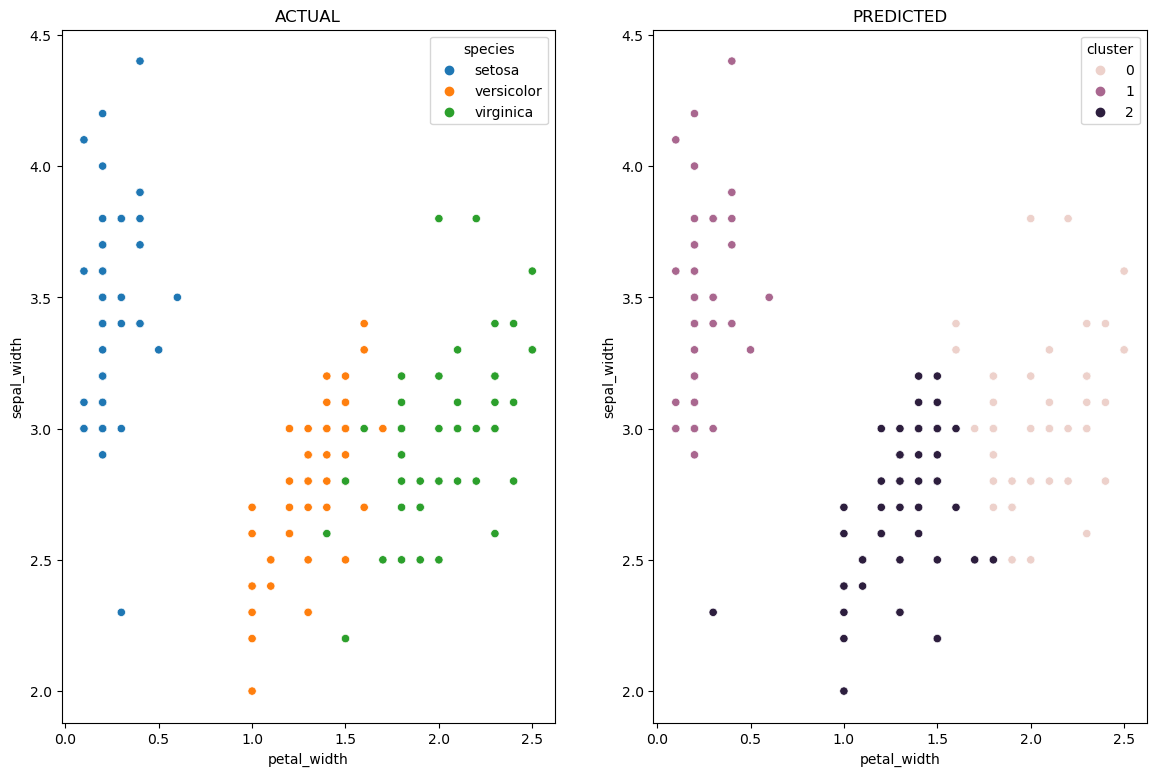

In [10]:
# graphically
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=df, x='petal_width', y='sepal_width', hue='species')
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X, x='petal_width', y='sepal_width', hue='cluster')
plt.title('PREDICTED')
plt.show()

# Elbow Method

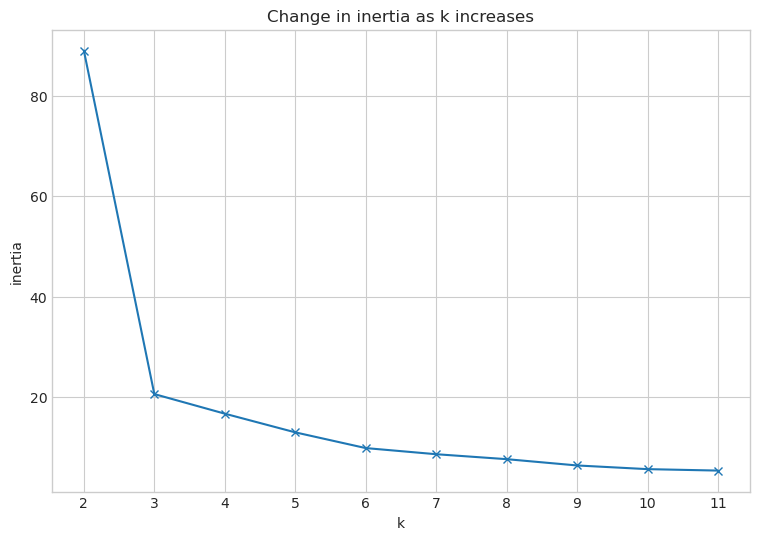

In [11]:
# plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

^^ 3 looks to be the best by leveling out

In [12]:
kmeans.inertia_

20.602395953664484

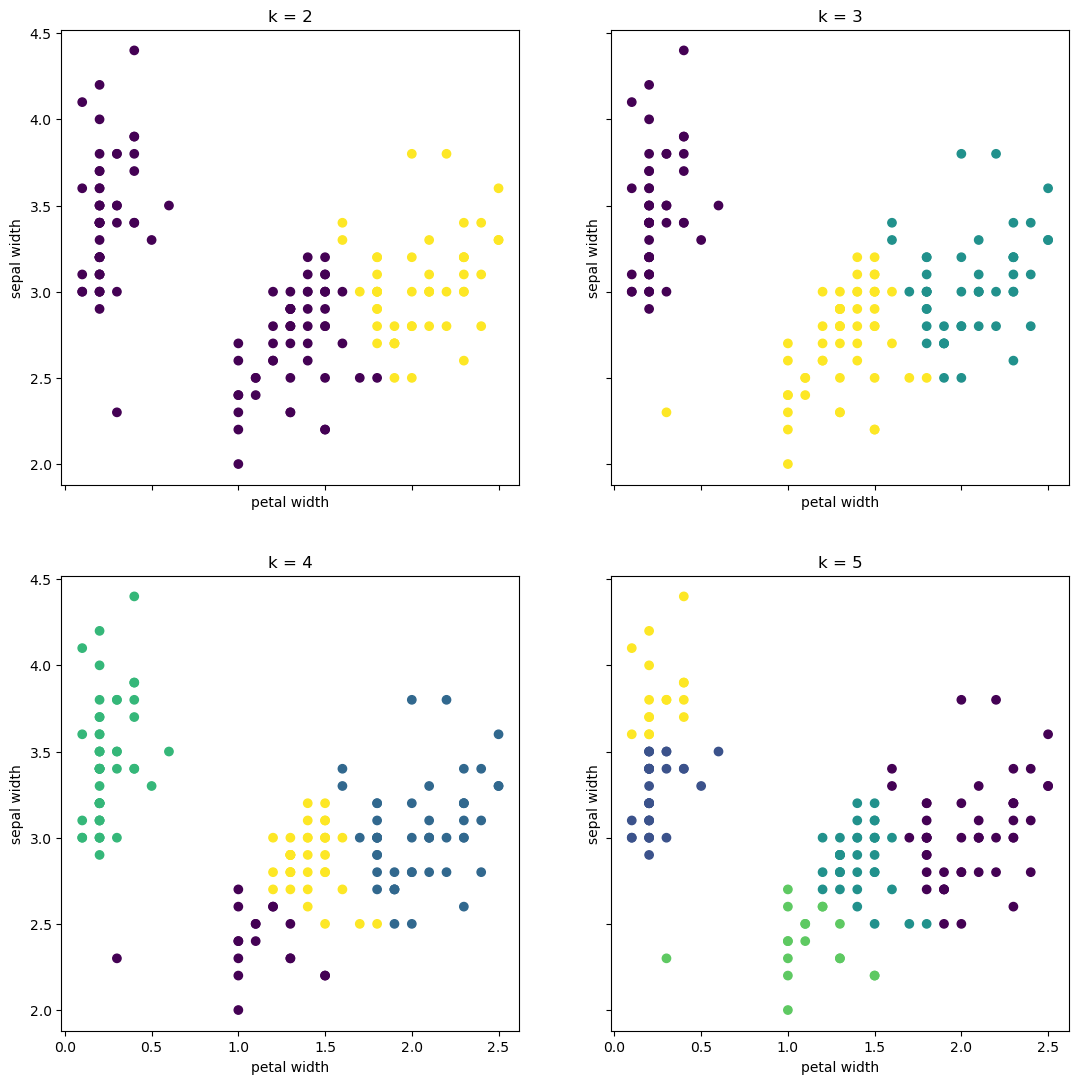

In [13]:
# visualize what value of k fits the data best
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal width')

### Selecting n_clusters=3 because it best fits the actual data 

# Running again, with 3 features

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


# Modeling (3)

In [15]:
# define independent variables for k-means

X = df[['petal_width', 'sepal_width', 'sepal_length']]
X.head()

,petal_width,sepal_width,sepal_length
1,0.2,3.5,5.1
2,0.2,3.0,4.9
3,0.2,3.2,4.7
4,0.2,3.1,4.6
5,0.2,3.6,5.0


In [16]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=3, random_state=123)

# fit on X
kmeans.fit(X)

# use on X
pred = kmeans.predict(X)

In [17]:
# add cluster prediction back onto original AND X dataframe

df['cluster'] = pred
X['cluster'] = pred

df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
50,5.0,3.3,1.4,0.2,setosa,1
86,6.0,3.4,4.5,1.6,versicolor,2
64,6.1,2.9,4.7,1.4,versicolor,2
43,4.4,3.2,1.3,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
20,5.1,3.8,1.5,0.3,setosa,1
115,5.8,2.8,5.1,2.4,virginica,2
144,6.8,3.2,5.9,2.3,virginica,0
147,6.3,2.5,5.0,1.9,virginica,2
70,5.6,2.5,3.9,1.1,versicolor,2


# Visualize

In [18]:
# first numerically
df.groupby('species')['petal_width','sepal_width','sepal_length','cluster'].mean()

,petal_width,sepal_width,sepal_length,cluster
species,,,,
setosa,0.246,3.428,5.006,1.00
versicolor,1.326,2.770,5.936,1.56
virginica,2.026,2.974,6.588,0.60


In [19]:
# cluster is numerical currently, must change to string to use HUE paramater
df['cluster'] = 'cluster_' + df.cluster.astype(str)

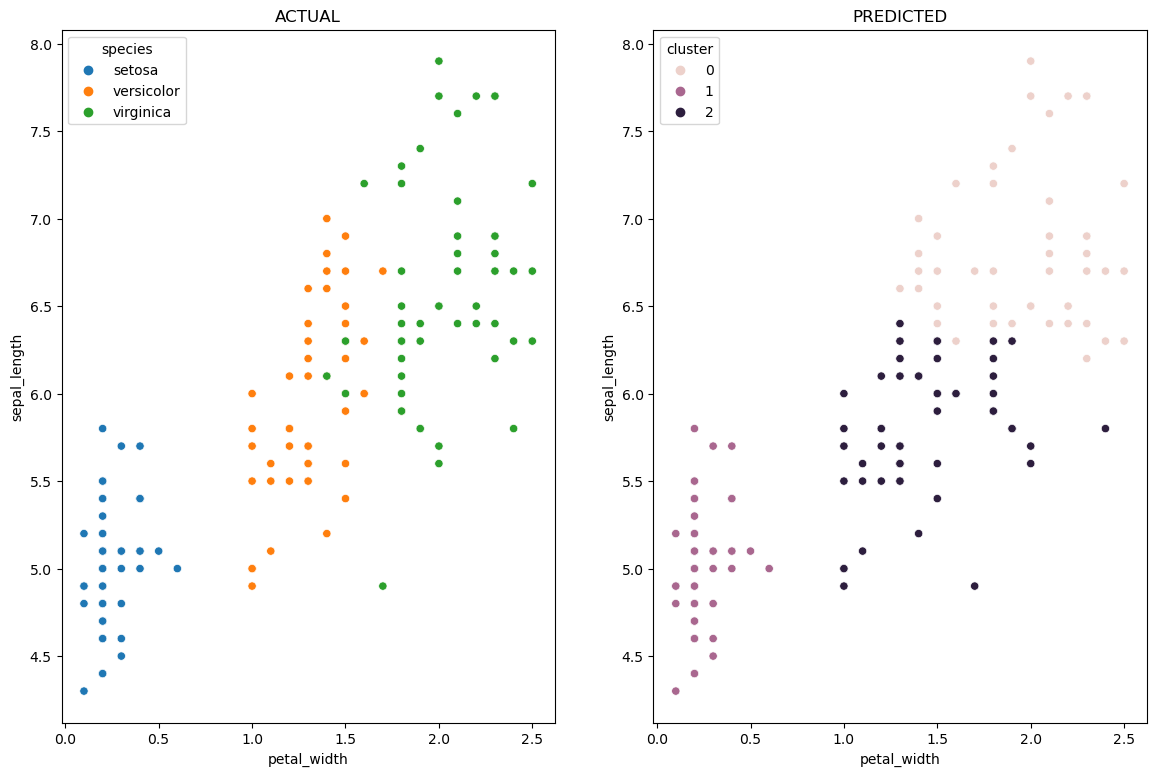

In [20]:
# graphically
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=df, x='petal_width', y='sepal_length', hue='species')
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X, x='petal_width', y='sepal_length', hue='cluster')
plt.title('PREDICTED')
plt.show()

# Elbow Method

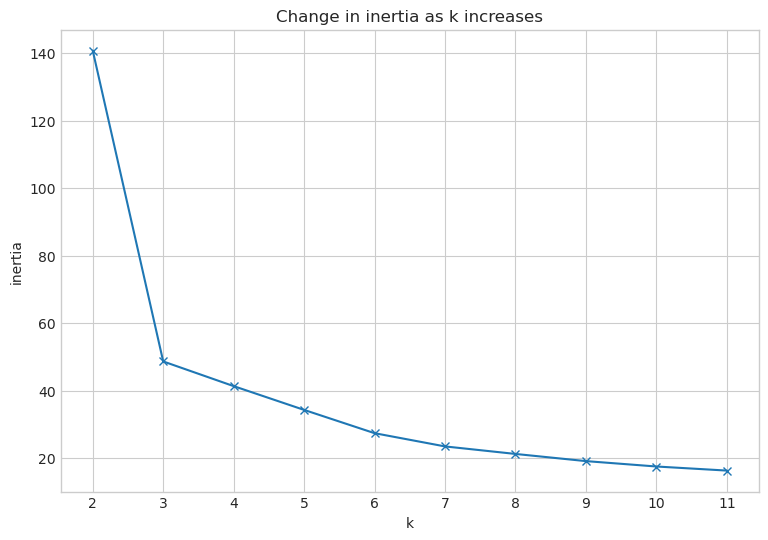

In [21]:
# plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [22]:
kmeans.inertia_

48.6607845410628

^^ 3 still looks to be the best visually

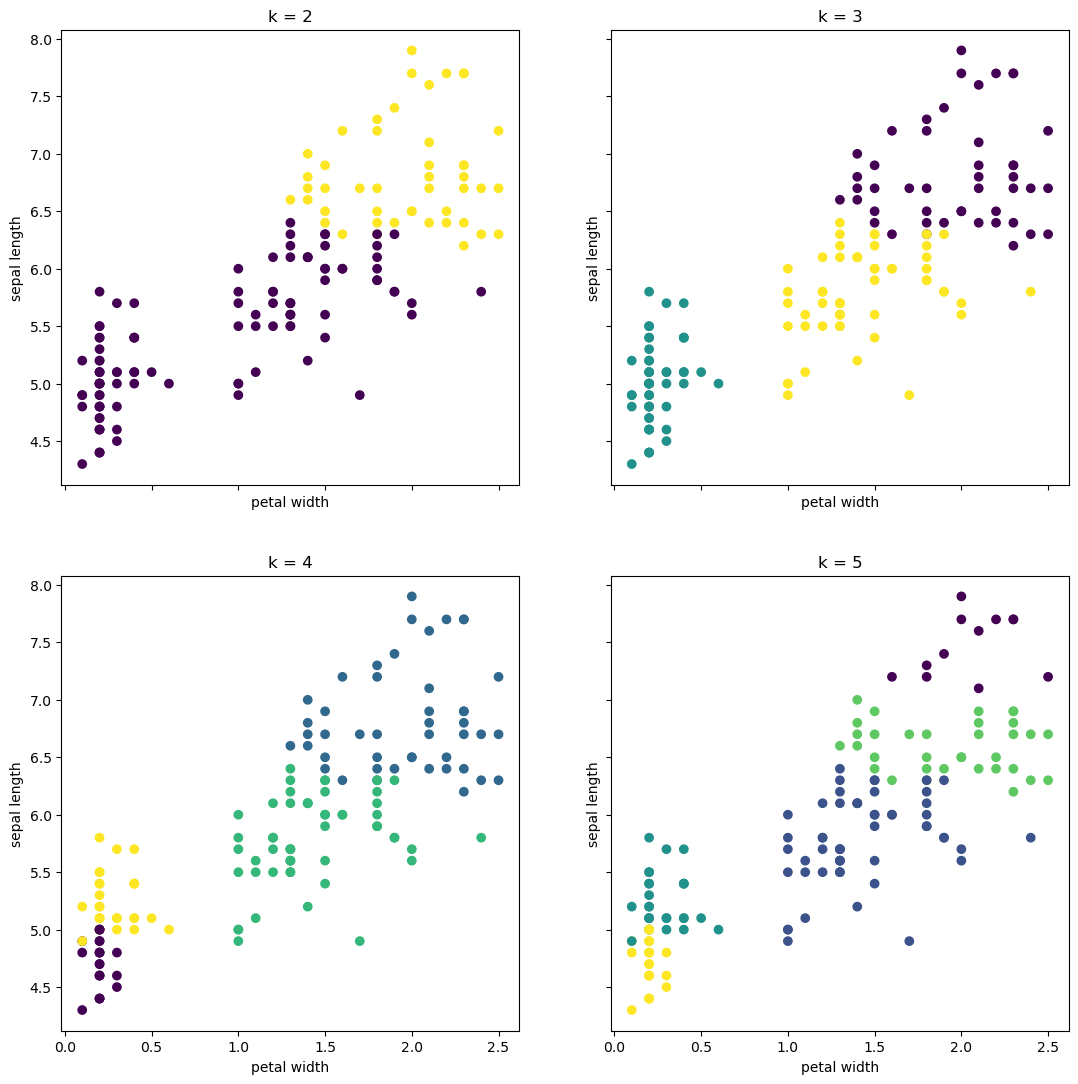

In [23]:
# visualize what value of k fits the data best
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.petal_width, X.sepal_length, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal length')

In [24]:
kmeans.inertia_

48.6607845410628

### Selecting n_clusters=3 and 2 features to send in because it best fits the actual data. The inertia was lower and the graphs were closer with 2 features and 3 clusters.

---

# Mall Customers
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

# Data Acquisition

In [25]:
query = """SELECT * FROM customers;"""

In [26]:
df = wr.get_data('mall_customers', query)
df.head()

CSV file found and loaded


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
df.shape

(200, 5)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


# Data Preperation

* Unscaled
* 3 features

In [31]:
# rename some columns
df = df.rename(columns={'customer_id':'id', 'annual_income':'income', 'spending_score':'spend'})
df = df.replace({'gender':{'Male':0, 'Female':1}}).rename(columns={'gender':'female'})
df.head()

,id,female,age,income,spend
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [32]:
# assign variables to go in as df
X = df[['age', 'income', 'female']]
X.head()

,age,income,female
0,19,15,0
1,21,15,0
2,20,16,1
3,23,16,1
4,31,17,1


# Modeling: Unscaled

### Cluster Size = 2

In [33]:
# make and fit the kmeans thing
# make

kmeans2 = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans2.fit(X)

# use on X
pred2 = kmeans2.predict(X)

In [34]:
# add cluster prediction back onto original AND X dataframe

df['cluster2'] = pred2
X['cluster2'] = pred2


df.sample(10)

,id,female,age,income,spend,cluster2
161,162,1,29,79,83,1
142,143,1,28,76,40,1
9,10,1,30,19,72,0
165,166,1,36,85,75,1
131,132,0,39,71,75,1
59,60,0,53,46,46,0
97,98,1,27,60,50,1
33,34,0,18,33,92,0
140,141,1,57,75,5,1
191,192,1,32,103,69,1


In [35]:
kmeans2.inertia_

87170.74887218045

### Cluster Size = 3

In [36]:
# make and fit the kmeans thing
# make

kmeans3 = KMeans(n_clusters=3, random_state=123)

# fit on X
kmeans3.fit(X)

# use on X
pred3 = kmeans3.predict(X)

In [37]:
# add cluster prediction back onto original AND X dataframe

df['cluster3'] = pred3
X['cluster3'] = pred3

df.sample(10)

,id,female,age,income,spend,cluster2,cluster3
46,47,1,50,40,55,0,2
47,48,1,27,40,47,0,1
153,154,1,38,78,76,1,0
122,123,1,40,69,58,1,0
176,177,0,58,88,15,1,0
138,139,0,19,74,10,1,0
199,200,0,30,137,83,1,0
0,1,0,19,15,39,0,1
175,176,1,30,88,86,1,0
55,56,0,47,43,41,0,2


In [38]:
kmeans3.inertia_

59540.527916041974

### Cluster Size = 4

In [39]:
# make and fit the kmeans thing
# make

kmeans4 = KMeans(n_clusters=4, random_state=123)

# fit on X
kmeans4.fit(X)

# use on X
pred4 = kmeans4.predict(X)

In [40]:
# add cluster prediction back onto original AND X dataframe

df['cluster4'] = pred4
X['cluster4'] = pred4

df.sample(10)

,id,female,age,income,spend,cluster2,cluster3,cluster4
27,28,0,35,28,61,0,1,1
173,174,0,36,87,92,1,0,0
112,113,1,38,64,42,1,0,0
52,53,1,31,43,54,0,1,1
110,111,0,65,63,52,0,2,3
65,66,0,18,48,59,0,1,1
114,115,1,18,65,48,1,0,0
198,199,0,32,137,18,1,0,2
74,75,0,59,54,47,0,2,3
129,130,0,38,71,75,1,0,0


In [41]:
kmeans4.inertia_

39592.03122665006

# Visualize: Unscaled Modeled Data

In [42]:
# clusters are numerical - switch to object type to plot

# cluster is numerical currently, must change to string to use HUE paramater
df['cluster2'] = 'cluster2_' + df.cluster2.astype(str)
X['cluster2'] = 'cluster2_' + X.cluster2.astype(str)

df['cluster3'] = 'cluster3_' + df.cluster3.astype(str)
X['cluster3'] = 'cluster3_' + X.cluster3.astype(str)

df['cluster4'] = 'cluster4_' + df.cluster4.astype(str)
X['cluster4'] = 'cluster4_' + X.cluster4.astype(str)


In [43]:
X.head()

,age,income,female,cluster2,cluster3,cluster4
0,19,15,0,cluster2_0,cluster3_1,cluster4_1
1,21,15,0,cluster2_0,cluster3_1,cluster4_1
2,20,16,1,cluster2_0,cluster3_1,cluster4_1
3,23,16,1,cluster2_0,cluster3_1,cluster4_1
4,31,17,1,cluster2_0,cluster3_1,cluster4_1


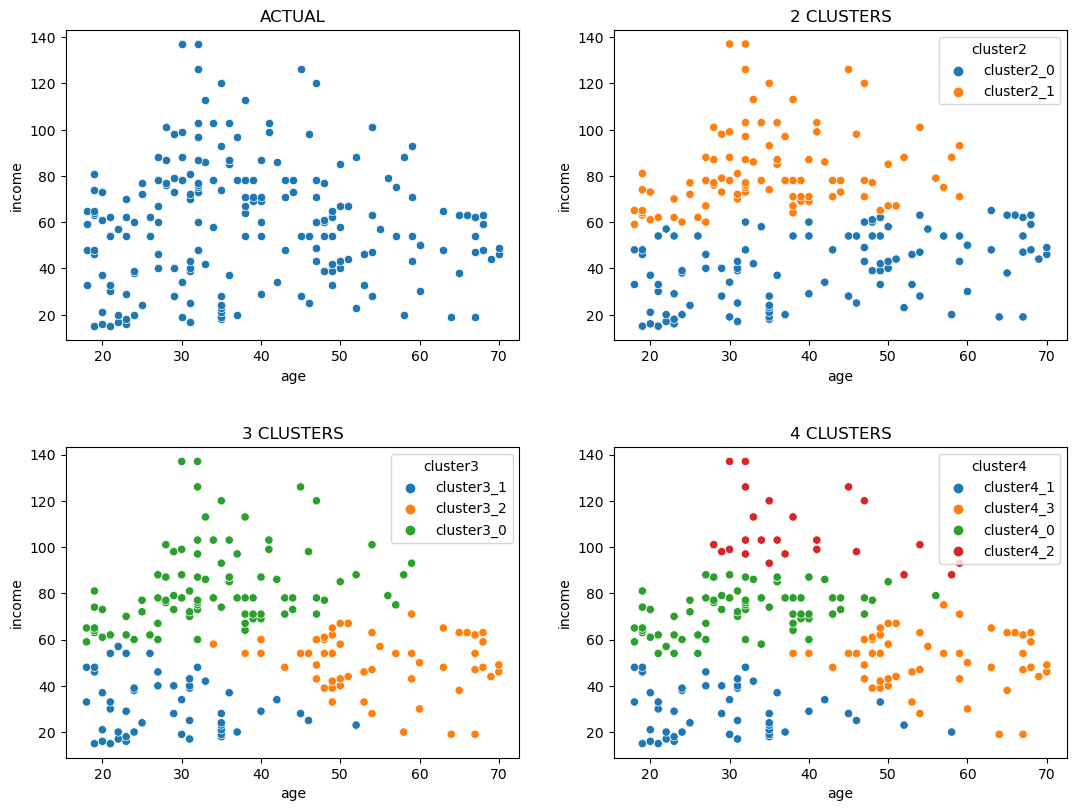

In [47]:
# graphically
plt.figure(figsize=(12, 9))

plt.subplot(221)
plt.tight_layout(pad=6)
sns.scatterplot(data=df, x='age', y='income')
plt.title('ACTUAL')

plt.subplot(222)
sns.scatterplot(data=X, x='age', y='income', hue='cluster2')
plt.title('2 CLUSTERS')

plt.subplot(223)
sns.scatterplot(data=X, x='age', y='income', hue='cluster3')
plt.title('3 CLUSTERS')

plt.subplot(224)
sns.scatterplot(data=X, x='age', y='income', hue='cluster4')
plt.title('4 CLUSTERS')
plt.show()

#### ^^ It looks like cluster of 2 is giving the best representation... 3 and above, the clusters get muddled and have no clearly defined patterns.

# Data Preperation

* Scaled
* 3 Features

In [48]:
# assign variables to go in as df_scaled
X = df[['age', 'income', 'female']]
X.head()

,age,income,female
0,19,15,0
1,21,15,0
2,20,16,1
3,23,16,1
4,31,17,1


In [49]:
# scale the data using MinMax Scaler
def scale_unsplit_data(df):
    """Scales unsplit data returning scaled df
    ---
    Format: df_scaled = function()
    """
    #make copies for scaling
    to_scale = df.columns.tolist()
    df_scaled = df.copy()

    #scale
    #make the scaler
    scaler = MinMaxScaler()

    #fit the thing with column names
    scaler.fit(df[to_scale])

    #use the scaler
    df_scaled[to_scale] = scaler.transform(df[to_scale])

    return df_scaled

In [50]:
X_scaled = scale_unsplit_data(X)
X_scaled.head()

,age,income,female
0,0.019231,0.000000,0.0
1,0.057692,0.000000,0.0
2,0.038462,0.008197,1.0
3,0.096154,0.008197,1.0
4,0.250000,0.016393,1.0


# Modeling: Scaled

In [51]:
# make and fit the kmeans thing
# make

kmeans2 = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans2.fit(X_scaled)

# use on X
pred2 = kmeans2.predict(X_scaled)

In [52]:
# add cluster prediction back onto original AND X dataframe

df['cluster2_scaled'] = pred2
X_scaled['cluster2_scaled'] = pred2

df.sample(10)

,id,female,age,income,spend,cluster2,cluster3,cluster4,cluster2_scaled
149,150,0,34,78,90,cluster2_1,cluster3_0,cluster4_0,0
75,76,0,26,54,54,cluster2_0,cluster3_1,cluster4_0,0
59,60,0,53,46,46,cluster2_0,cluster3_2,cluster4_3,0
6,7,1,35,18,6,cluster2_0,cluster3_1,cluster4_1,1
12,13,1,58,20,15,cluster2_0,cluster3_2,cluster4_1,1
122,123,1,40,69,58,cluster2_1,cluster3_0,cluster4_0,1
74,75,0,59,54,47,cluster2_0,cluster3_2,cluster4_3,0
101,102,1,49,62,48,cluster2_0,cluster3_2,cluster4_3,1
17,18,0,20,21,66,cluster2_0,cluster3_1,cluster4_1,0
128,129,0,59,71,11,cluster2_1,cluster3_2,cluster4_3,0


In [53]:
kmeans2.inertia_

23.501353182712187

### Cluster Size = 3

In [54]:
# make and fit the kmeans thing
# make

kmeans3 = KMeans(n_clusters=3, random_state=123)

# fit on X
kmeans3.fit(X_scaled)

# use on X
pred3 = kmeans3.predict(X_scaled)

In [55]:
# add cluster prediction back onto original AND X dataframe

df['cluster3_scaled'] = pred3
X_scaled['cluster3_scaled'] = pred3

df.sample(10)

,id,female,age,income,spend,cluster2,cluster3,cluster4,cluster2_scaled,cluster3_scaled
109,110,0,66,63,48,cluster2_0,cluster3_2,cluster4_3,0,0
106,107,1,66,63,50,cluster2_0,cluster3_2,cluster4_3,1,1
122,123,1,40,69,58,cluster2_1,cluster3_0,cluster4_0,1,1
44,45,1,49,39,28,cluster2_0,cluster3_2,cluster4_3,1,1
101,102,1,49,62,48,cluster2_0,cluster3_2,cluster4_3,1,1
133,134,1,31,72,71,cluster2_1,cluster3_0,cluster4_0,1,1
14,15,0,37,20,13,cluster2_0,cluster3_1,cluster4_1,0,2
183,184,1,29,98,88,cluster2_1,cluster3_0,cluster4_2,1,1
92,93,0,48,60,49,cluster2_0,cluster3_2,cluster4_3,0,0
130,131,0,47,71,9,cluster2_1,cluster3_0,cluster4_0,0,0


In [56]:
kmeans3.inertia_

17.559393308492513

### Cluster Size = 4

In [57]:
# make and fit the kmeans thing
# make

kmeans4 = KMeans(n_clusters=4, random_state=123)

# fit on X
kmeans4.fit(X_scaled)

# use on X
pred4 = kmeans4.predict(X_scaled)

In [58]:
# add cluster prediction back onto original AND X dataframe

df['cluster4_scaled'] = pred4
X_scaled['cluster4_scaled'] = pred4

df.sample(10)

,id,female,age,income,spend,cluster2,cluster3,cluster4,cluster2_scaled,cluster3_scaled,cluster4_scaled
34,35,1,49,33,14,cluster2_0,cluster3_2,cluster4_1,1,1,0
77,78,0,40,54,48,cluster2_0,cluster3_2,cluster4_3,0,2,1
92,93,0,48,60,49,cluster2_0,cluster3_2,cluster4_3,0,0,2
102,103,0,67,62,59,cluster2_0,cluster3_2,cluster4_3,0,0,2
106,107,1,66,63,50,cluster2_0,cluster3_2,cluster4_3,1,1,0
47,48,1,27,40,47,cluster2_0,cluster3_1,cluster4_1,1,1,3
37,38,1,30,34,73,cluster2_0,cluster3_1,cluster4_1,1,1,3
13,14,1,24,20,77,cluster2_0,cluster3_1,cluster4_1,1,1,3
64,65,0,63,48,51,cluster2_0,cluster3_2,cluster4_3,0,0,2
88,89,1,34,58,60,cluster2_0,cluster3_2,cluster4_0,1,1,3


In [59]:
kmeans4.inertia_

12.778301773494501

# Visualize: Unscaled Modeled Data

In [60]:
X.head()

,age,income,female
0,19,15,0
1,21,15,0
2,20,16,1
3,23,16,1
4,31,17,1


In [61]:
# clusters are numerical - change to object to plot

df['cluster2_scaled'] = 'cluster2_scaled_' + df.cluster2_scaled.astype(str)
X_scaled['cluster2_scaled'] = 'cluster2_scaled_' + X_scaled.cluster2_scaled.astype(str)

df['cluster3_scaled'] = 'cluster3_scaled_' + df.cluster3_scaled.astype(str)
X_scaled['cluster3_scaled'] = 'cluster3_scaled_' + X_scaled.cluster3_scaled.astype(str)

df['cluster4_scaled'] = 'cluster4_scaled_' + df.cluster4_scaled.astype(str)
X_scaled['cluster4_scaled'] = 'cluster4_scaled_' + X_scaled.cluster4_scaled.astype(str)

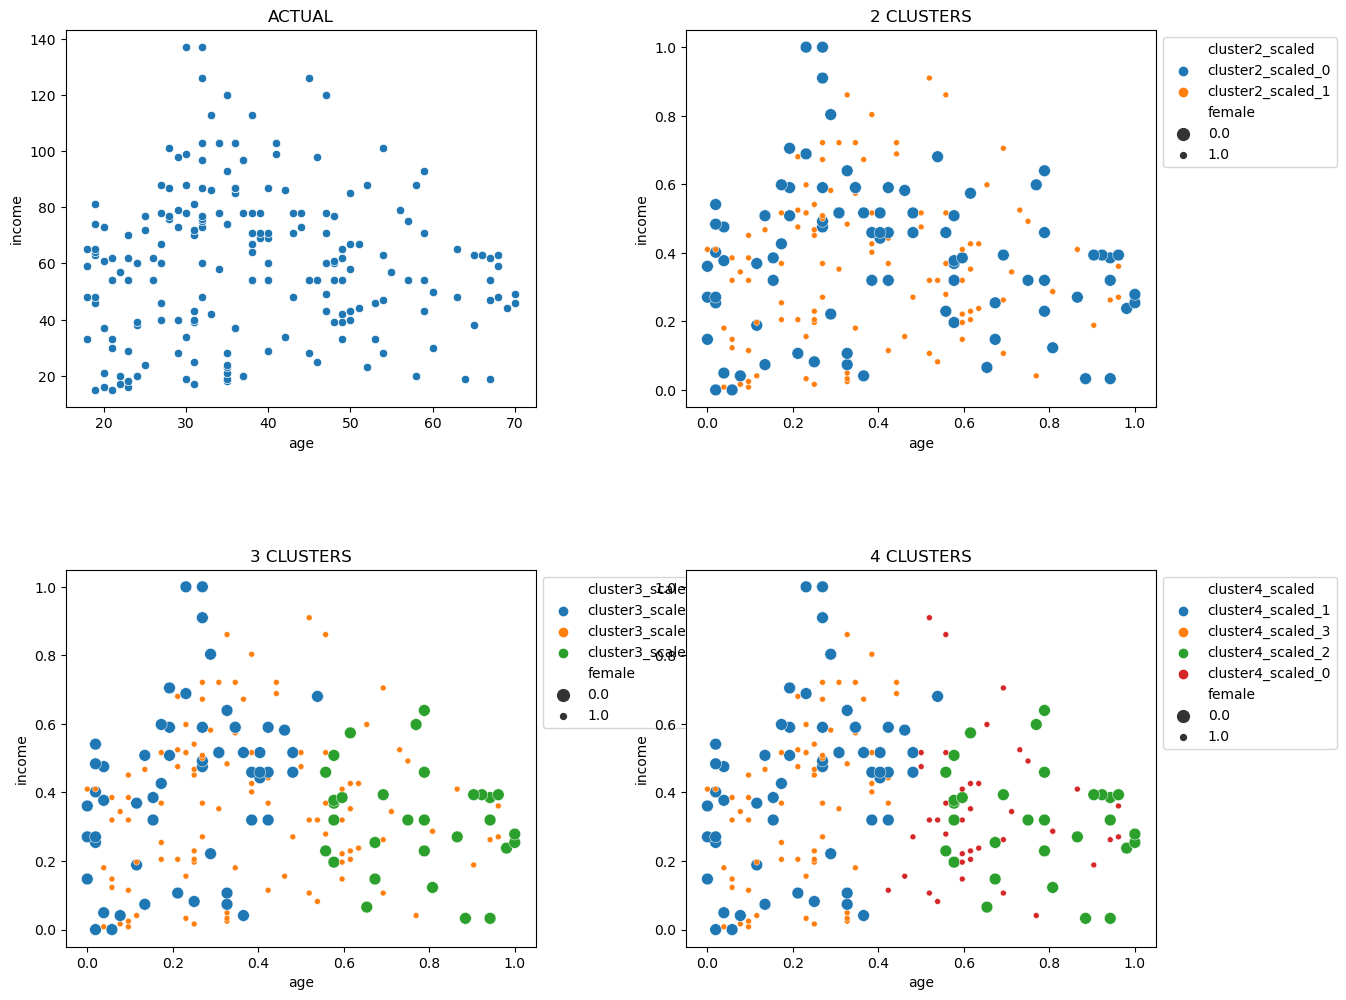

In [74]:
# graphically
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.tight_layout(pad=10)
sns.scatterplot(data=df, x='age', y='income')
plt.title('ACTUAL')

plt.subplot(222)
sns.scatterplot(data=X_scaled, x='age', y='income', hue='cluster2_scaled', size='female')
plt.title('2 CLUSTERS')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

plt.subplot(223)
sns.scatterplot(data=X_scaled, x='age', y='income', hue='cluster3_scaled', size='female')
plt.title('3 CLUSTERS')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

plt.subplot(224)
sns.scatterplot(data=X_scaled, x='age', y='income', hue='cluster4_scaled',  size='female')
plt.title('4 CLUSTERS')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

#### ^^ Scaled data performed better for KMeans test. Cluster size of 2 looks to fit the data the best, like in the unscaled visuals.